In [180]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
import spacy
#import community as community_louvain
from community import community_louvain

In [181]:
nlp = spacy.load("en_core_web_sm")

In [182]:
#load preprocessed data
preprocessed_data = pd.read_csv('Gaza_v2_preprocessed.csv')
preprocessed_data.head()

,article_title,author,published_time,article_text
0,Death toll of Palestinians in Gaza rises to 27...,By Xinhua,"Published: Feb 06, 2024 10:19 AM",People gather around a destroyed house after a...
1,"China, Norway should be forces for stability, ...",By Global Times,"Published: Feb 06, 2024 12:35 PM",China Foreign Minister Wang Yi (right) meets w...
2,"Wang, Eide hold talks as Europe's China policy...",By Fan Anqi,"Published: Feb 06, 2024 10:57 PM",China Foreign Minister Wang Yi (right) meets w...
3,Why does the US keep creating wars while sayin...,By Global Times,"Published: Feb 04, 2024 12:41 AM","Illustration: Liu Rui/GTOn Friday local time, ..."
4,"With war next door, EU noses into Indo-Pacific",By Mark Blacklock,"Published: Feb 04, 2024 06:59 PM",Photo: VCGWestern attitudes toward Asia can so...


In [132]:
#load top 50 words for each entity type from the NER results
ner_results = pd.read_excel('Gazav2_TopWords.xlsx')
ner_results.head()

,Entity Type,Word,Count
0,LOC,Israel,1943
1,LOC,Gaza,1682
2,LOC,US,912
3,LOC,China,894
4,LOC,Palestine,876


In [133]:
#filtering top 5 entities for each type
top_5 = ner_results.groupby('Entity Type').head(5)
top_5

,Entity Type,Word,Count
0,LOC,Israel,1943
1,LOC,Gaza,1682
2,LOC,US,912
3,LOC,China,894
4,LOC,Palestine,876
40,MISC,Palestinian-Israeli Conflict,163
41,MISC,West,59
42,MISC,Hamas,57
43,MISC,Houthi,42
44,MISC,Islamic,39


In [134]:
#combine top 5 into a single list of entities
entities = top_5['Word'].tolist()
entities

['Israel',
 'Gaza',
 'US',
 'China',
 'Palestine',
 'Palestinian-Israeli Conflict',
 'West',
 'Hamas',
 'Houthi',
 'Islamic',
 'Hamas',
 'Xinhua',
 'UN',
 'Health Ministry',
 'EU',
 'Wang Yi',
 'Joe Biden',
 'Zhang Jun',
 'Zhai Jun',
 'Antony Blinken']

In [217]:
entities = [
    "Palestinian-Israeli Conflict", "Israel", "Gaza", "Palestine", "US",
    "China", "West", "Saudi Arabia", "West Bank", "Middle East",
    "Houthi", "Hamas", "Rafah", "UN", "Wang Yi",
    "Joe Biden", "Antony Blinken", "Zhang Jun", "Xi Jinping", "Benjamin Netanyahu",
    "Antonio Guterres", "EU"
] #EU Union outlier make the visualization bad

# Relationship with co-occurence based in same sentence

In [218]:
#initialize graph
G = nx.Graph()

#add nodes for each entity
for entity in entities:
    G.add_node(entity)

In [219]:
co_occurrence = defaultdict(int)

In [220]:
#iterate through the articles and process with SpaCy to get sentences
for article in preprocessed_data['article_text']:
    doc = nlp(article)
    sentences = [sent.text for sent in doc.sents]
    #print(sentences)

    #iterate through each sentence in the article
    for sentence in sentences:
        present_entities = [entity for entity in entities if entity in sentence]
        #print(present_entities)
        for i in range(len(present_entities)):
            for j in range(i + 1, len(present_entities)):
                co_occurrence[(present_entities[i], present_entities[j])] += 1
                #print(co_occurrence)

In [221]:
co_occurrence

defaultdict(int,
            {('Israel', 'Gaza'): 1157,
             ('Israel', 'Rafah'): 93,
             ('Gaza', 'Rafah'): 208,
             ('Israel', 'Palestine'): 980,
             ('Israel', 'Hamas'): 674,
             ('Gaza', 'Palestine'): 544,
             ('Gaza', 'Hamas'): 373,
             ('Palestine', 'Hamas'): 294,
             ('China', 'Wang Yi'): 38,
             ('China', 'EU'): 94,
             ('Gaza', 'Middle East'): 52,
             ('Middle East', 'Wang Yi'): 5,
             ('Palestinian-Israeli Conflict', 'Israel'): 262,
             ('Palestinian-Israeli Conflict', 'US'): 62,
             ('Palestinian-Israeli Conflict', 'China'): 72,
             ('Palestinian-Israeli Conflict', 'EU'): 7,
             ('Israel', 'US'): 620,
             ('Israel', 'China'): 354,
             ('Israel', 'EU'): 45,
             ('US', 'China'): 405,
             ('US', 'EU'): 106,
             ('US', 'UN'): 131,
             ('US', 'Middle East'): 208,
             ('Israel',

In [222]:
#define a threshold for edge weights for visualization purposes
weight_threshold = 10

In [223]:
#add edges with weights to the graph, filtering by the threshold
selected_edges = []
for (entity1, entity2), weight in co_occurrence.items():
    if weight >= weight_threshold:
        G.add_edge(entity1, entity2, weight=weight)
        selected_edges.append((entity1, entity2, weight))

In [224]:
selected_edges

[('Israel', 'Gaza', 1157),
 ('Israel', 'Rafah', 93),
 ('Gaza', 'Rafah', 208),
 ('Israel', 'Palestine', 980),
 ('Israel', 'Hamas', 674),
 ('Gaza', 'Palestine', 544),
 ('Gaza', 'Hamas', 373),
 ('Palestine', 'Hamas', 294),
 ('China', 'Wang Yi', 38),
 ('China', 'EU', 94),
 ('Gaza', 'Middle East', 52),
 ('Palestinian-Israeli Conflict', 'Israel', 262),
 ('Palestinian-Israeli Conflict', 'US', 62),
 ('Palestinian-Israeli Conflict', 'China', 72),
 ('Israel', 'US', 620),
 ('Israel', 'China', 354),
 ('Israel', 'EU', 45),
 ('US', 'China', 405),
 ('US', 'EU', 106),
 ('US', 'UN', 131),
 ('US', 'Middle East', 208),
 ('Israel', 'Middle East', 181),
 ('Palestine', 'US', 203),
 ('Palestine', 'Middle East', 98),
 ('Gaza', 'US', 200),
 ('Gaza', 'EU', 23),
 ('US', 'West', 104),
 ('West', 'Middle East', 22),
 ('West', 'EU', 10),
 ('China', 'UN', 144),
 ('China', 'West', 53),
 ('Israel', 'UN', 186),
 ('US', 'Joe Biden', 127),
 ('Middle East', 'Joe Biden', 20),
 ('Gaza', 'China', 152),
 ('China', 'Middle East

In [225]:
#calculate node strength -- the sum of the weights of edges connected to them
node_strength = {node: sum(data['weight'] for _, _, data in G.edges(node, data=True)) for node in G.nodes}
max_strength = max(node_strength.values())

In [226]:
#normalize node sizes based on their strength
node_sizes = [node_strength[node] / max_strength * 1000 for node in G.nodes]

In [227]:
from community import community_louvain

In [228]:
#apply the Louvain method for community detection
partition = community_louvain.best_partition(G, weight='weight')

In [229]:
partition

{'Palestinian-Israeli Conflict': 0,
 'Israel': 1,
 'Gaza': 1,
 'Palestine': 1,
 'US': 0,
 'China': 0,
 'West': 2,
 'Saudi Arabia': 0,
 'West Bank': 2,
 'Middle East': 0,
 'Houthi': 0,
 'Hamas': 1,
 'Rafah': 1,
 'UN': 0,
 'Wang Yi': 0,
 'Joe Biden': 0,
 'Antony Blinken': 0,
 'Zhang Jun': 0,
 'Xi Jinping': 0,
 'Benjamin Netanyahu': 1,
 'Antonio Guterres': 0,
 'EU': 0}

In [230]:
#add the community information to the graph
for node, community in partition.items():
    G.nodes[node]['community'] = community

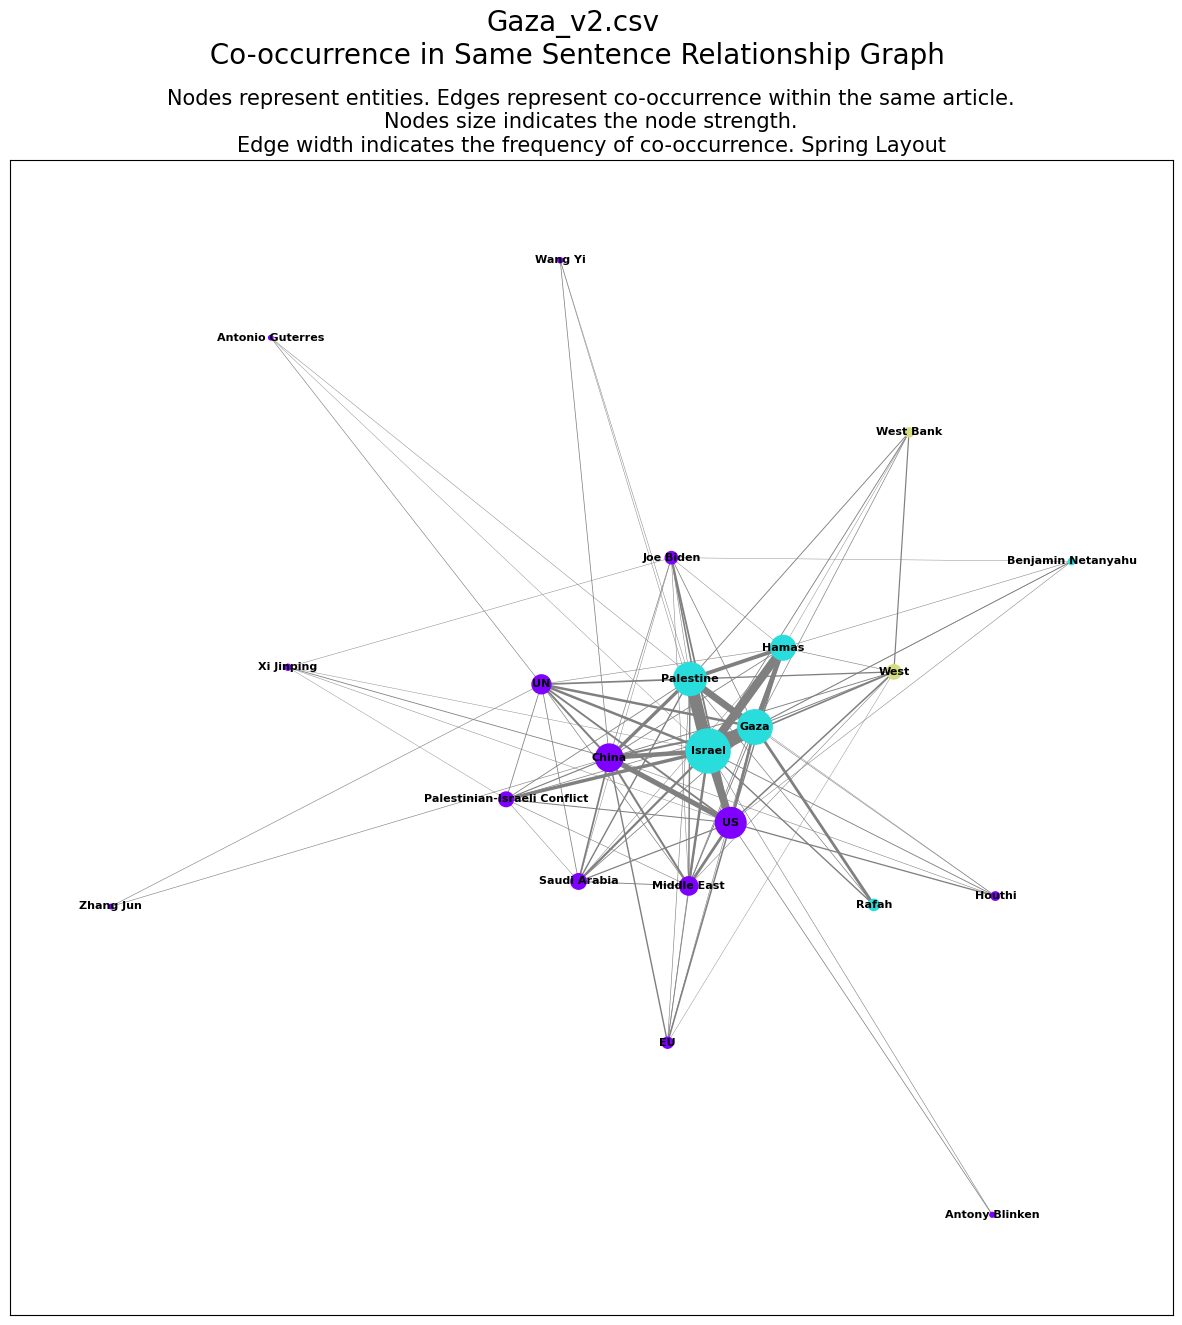

In [231]:
#draw the graph
plt.figure(figsize=(15, 15))
pos = nx.spring_layout(G)

#get the community color map
communities = set(partition.values())
colors = [plt.cm.rainbow(i / len(communities)) for i in range(len(communities))]
node_colors = [colors[partition[node]] for node in G.nodes]

#draw nodes with community colors
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, cmap=plt.cm.rainbow, node_color=node_colors)

#draw edges with normalized weights
edges = G.edges(data=True)
weights = [edge[2]['weight'] for edge in edges]
max_weight = max(weights)
min_width = 0.2
normalized_weights = [(weight / max_weight * 10) + min_width for weight in weights]
nx.draw_networkx_edges(G, pos, edgelist=edges, width=normalized_weights, edge_color='gray')

#draw labels
nx.draw_networkx_labels(G, pos, font_size=8, font_weight='bold')

#labels = nx.get_edge_attributes(G, 'weight')
#nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=8)

#title
plt.suptitle("Gaza_v2.csv\n Co-occurrence in Same Sentence Relationship Graph", fontsize=20)
plt.title("Nodes represent entities. Edges represent co-occurrence within the same article.\nNodes size indicates the node strength.\nEdge width indicates the frequency of co-occurrence. Spring Layout", fontsize=15)
plt.show()

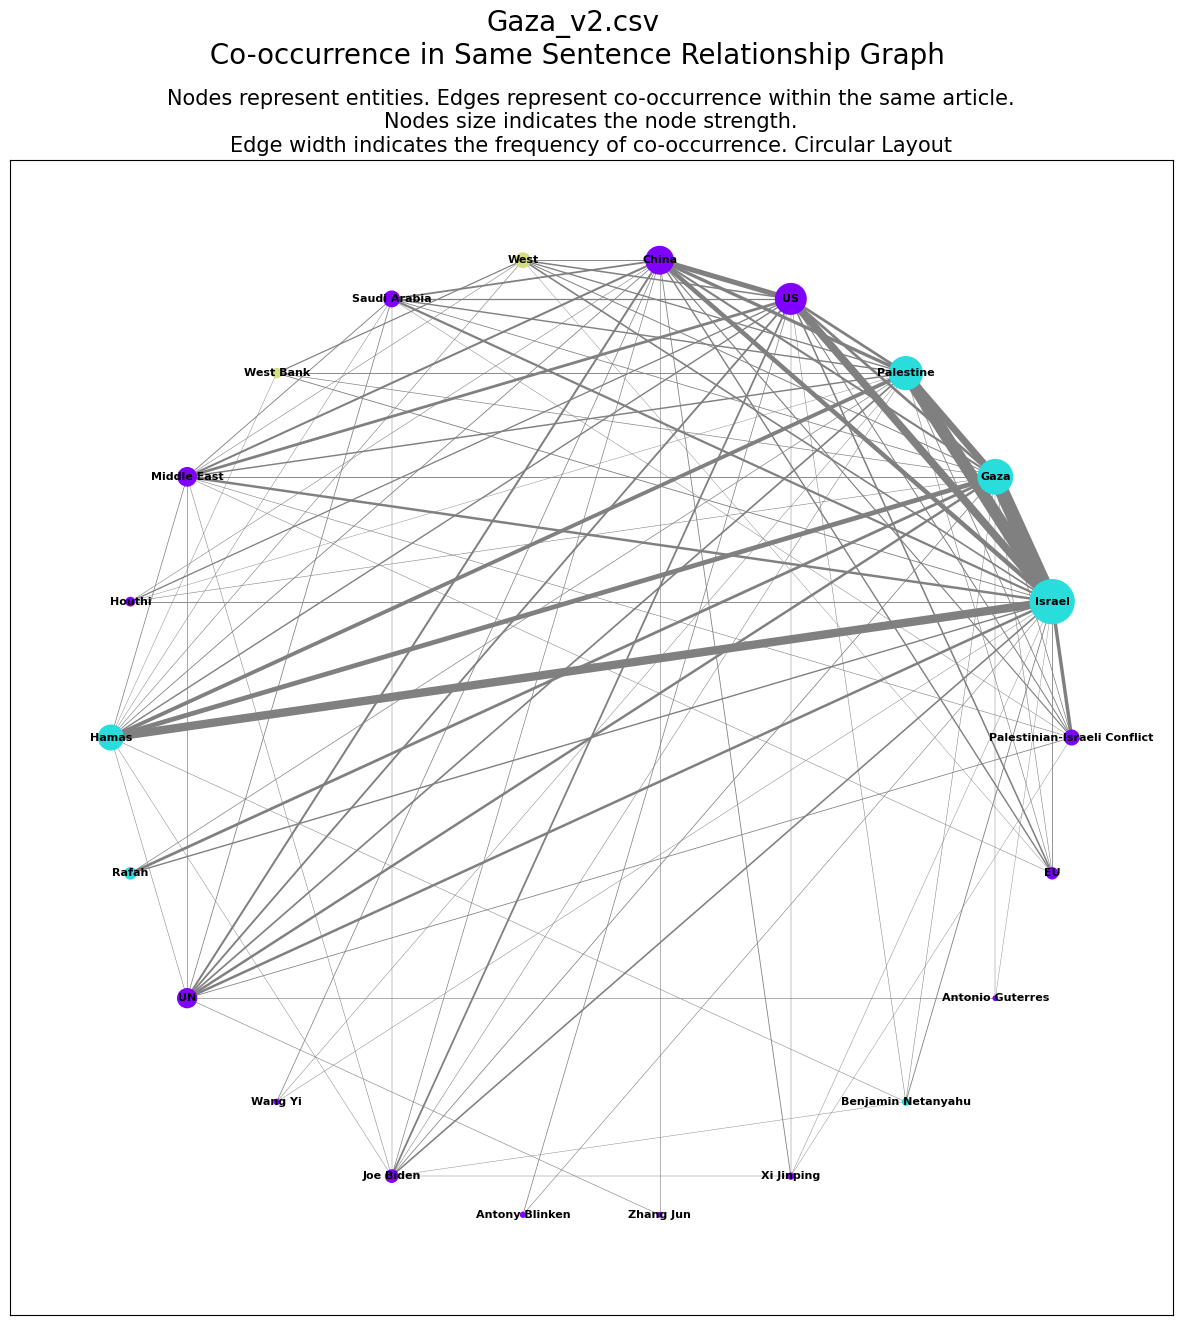

In [232]:
#draw the graph
plt.figure(figsize=(15, 15))
pos = nx.circular_layout(G)

#get the community color map
communities = set(partition.values())
colors = [plt.cm.rainbow(i / len(communities)) for i in range(len(communities))]
node_colors = [colors[partition[node]] for node in G.nodes]

#draw nodes with community colors
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, cmap=plt.cm.rainbow, node_color=node_colors)

#draw edges with normalized weights
edges = G.edges(data=True)
weights = [edge[2]['weight'] for edge in edges]
max_weight = max(weights)
min_width = 0.2
normalized_weights = [(weight / max_weight * 10) + min_width for weight in weights]
nx.draw_networkx_edges(G, pos, edgelist=edges, width=normalized_weights, edge_color='gray')

#draw labels
nx.draw_networkx_labels(G, pos, font_size=8, font_weight='bold')

#labels = nx.get_edge_attributes(G, 'weight')
#x.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=8)

#add title and show plot
plt.suptitle("Gaza_v2.csv\n Co-occurrence in Same Sentence Relationship Graph", fontsize=20)
plt.title("Nodes represent entities. Edges represent co-occurrence within the same article.\nNodes size indicates the node strength.\nEdge width indicates the frequency of co-occurrence. Circular Layout", fontsize=15)
plt.show()

# Relationship with co-occurence based in same article

In [233]:
#initialize graph
G = nx.Graph()

#add nodes for each entity
for entity in entities:
    G.add_node(entity)

In [234]:
co_occurrence = defaultdict(int)

#iterate through each article in the preprocessed dataset
for article in preprocessed_data['article_text']:
    #find all entities present in the article
    present_entities = [entity for entity in entities if entity in article]
    #print(present_entities)

    #track co-occurrences within the article
    for i in range(len(present_entities)):
        for j in range(i + 1, len(present_entities)):
            co_occurrence[(present_entities[i], present_entities[j])] += 1
            #print(co_occurrence)

In [235]:
co_occurrence

defaultdict(int,
            {('Israel', 'Gaza'): 306,
             ('Israel', 'Palestine'): 260,
             ('Israel', 'Hamas'): 189,
             ('Israel', 'Rafah'): 71,
             ('Gaza', 'Palestine'): 274,
             ('Gaza', 'Hamas'): 190,
             ('Gaza', 'Rafah'): 79,
             ('Palestine', 'Hamas'): 174,
             ('Palestine', 'Rafah'): 67,
             ('Hamas', 'Rafah'): 60,
             ('Israel', 'China'): 198,
             ('Israel', 'Middle East'): 160,
             ('Israel', 'Wang Yi'): 33,
             ('Israel', 'EU'): 70,
             ('Gaza', 'China'): 219,
             ('Gaza', 'Middle East'): 167,
             ('Gaza', 'Wang Yi'): 34,
             ('Gaza', 'EU'): 83,
             ('Palestine', 'China'): 180,
             ('Palestine', 'Middle East'): 149,
             ('Palestine', 'Wang Yi'): 29,
             ('Palestine', 'EU'): 60,
             ('China', 'Middle East'): 155,
             ('China', 'Wang Yi'): 34,
             ('China', 'EU'

In [236]:
#define a threshold for edge weights for visualization purposes
weight_threshold = 10

In [237]:
#add edges with weights to the graph, filtering by the threshold
selected_edges = []
for (entity1, entity2), weight in co_occurrence.items():
    if weight >= weight_threshold:
        G.add_edge(entity1, entity2, weight=weight)
        selected_edges.append((entity1, entity2, weight))

In [238]:
selected_edges

[('Israel', 'Gaza', 306),
 ('Israel', 'Palestine', 260),
 ('Israel', 'Hamas', 189),
 ('Israel', 'Rafah', 71),
 ('Gaza', 'Palestine', 274),
 ('Gaza', 'Hamas', 190),
 ('Gaza', 'Rafah', 79),
 ('Palestine', 'Hamas', 174),
 ('Palestine', 'Rafah', 67),
 ('Hamas', 'Rafah', 60),
 ('Israel', 'China', 198),
 ('Israel', 'Middle East', 160),
 ('Israel', 'Wang Yi', 33),
 ('Israel', 'EU', 70),
 ('Gaza', 'China', 219),
 ('Gaza', 'Middle East', 167),
 ('Gaza', 'Wang Yi', 34),
 ('Gaza', 'EU', 83),
 ('Palestine', 'China', 180),
 ('Palestine', 'Middle East', 149),
 ('Palestine', 'Wang Yi', 29),
 ('Palestine', 'EU', 60),
 ('China', 'Middle East', 155),
 ('China', 'Wang Yi', 34),
 ('China', 'EU', 78),
 ('Middle East', 'Wang Yi', 30),
 ('Middle East', 'EU', 59),
 ('Wang Yi', 'EU', 11),
 ('Palestinian-Israeli Conflict', 'Israel', 96),
 ('Palestinian-Israeli Conflict', 'Gaza', 96),
 ('Palestinian-Israeli Conflict', 'US', 71),
 ('Palestinian-Israeli Conflict', 'China', 85),
 ('Palestinian-Israeli Conflict', 'M

In [239]:
#calculate node strength -- the sum of the weights of edges connected to them
node_strength = {node: sum(data['weight'] for _, _, data in G.edges(node, data=True)) for node in G.nodes}
max_strength = max(node_strength.values())

In [240]:
#normalize node sizes based on their strength
node_sizes = [node_strength[node] / max_strength * 1000 for node in G.nodes]

In [241]:
#apply the Louvain method for community detection
partition = community_louvain.best_partition(G, weight='weight')

In [242]:
partition

{'Palestinian-Israeli Conflict': 0,
 'Israel': 1,
 'Gaza': 1,
 'Palestine': 1,
 'US': 0,
 'China': 0,
 'West': 0,
 'Saudi Arabia': 0,
 'West Bank': 0,
 'Middle East': 0,
 'Houthi': 0,
 'Hamas': 1,
 'Rafah': 1,
 'UN': 0,
 'Wang Yi': 0,
 'Joe Biden': 0,
 'Antony Blinken': 0,
 'Zhang Jun': 0,
 'Xi Jinping': 0,
 'Benjamin Netanyahu': 1,
 'Antonio Guterres': 1,
 'EU': 0}

In [243]:
#add the community information to the graph
for node, community in partition.items():
    G.nodes[node]['community'] = community

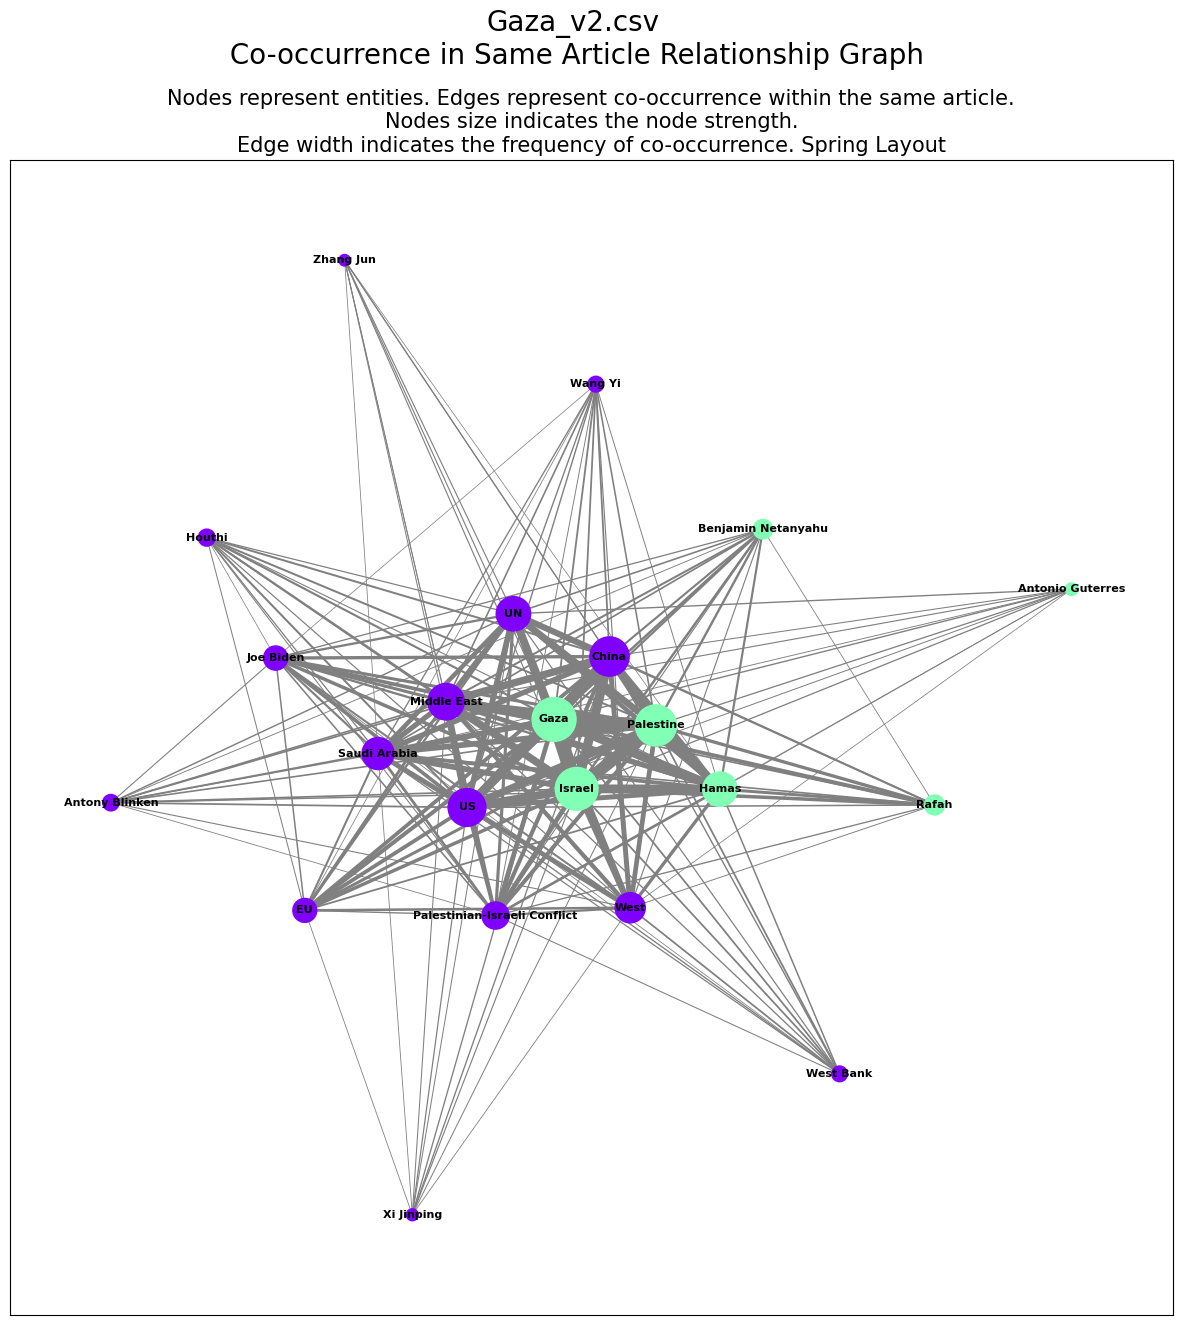

In [244]:
#draw the graph
plt.figure(figsize=(15, 15))
pos = nx.spring_layout(G)

#get the community color map
communities = set(partition.values())
colors = [plt.cm.rainbow(i / len(communities)) for i in range(len(communities))]
node_colors = [colors[partition[node]] for node in G.nodes]

#draw nodes with community colors
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, cmap=plt.cm.rainbow, node_color=node_colors)

#draw edges with normalized weights
edges = G.edges(data=True)
weights = [edge[2]['weight'] for edge in edges]
max_weight = max(weights)
min_width = 0.2
normalized_weights = [(weight / max_weight * 10) + min_width for weight in weights]
nx.draw_networkx_edges(G, pos, edgelist=edges, width=normalized_weights, edge_color='gray')

#draw labels
nx.draw_networkx_labels(G, pos, font_size=8, font_weight='bold')

#labels = nx.get_edge_attributes(G, 'weight')
#nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=8)

#add title and show plot
plt.suptitle("Gaza_v2.csv\n Co-occurrence in Same Article Relationship Graph", fontsize=20)
plt.title("Nodes represent entities. Edges represent co-occurrence within the same article.\nNodes size indicates the node strength.\nEdge width indicates the frequency of co-occurrence. Spring Layout", fontsize=15)
plt.show()

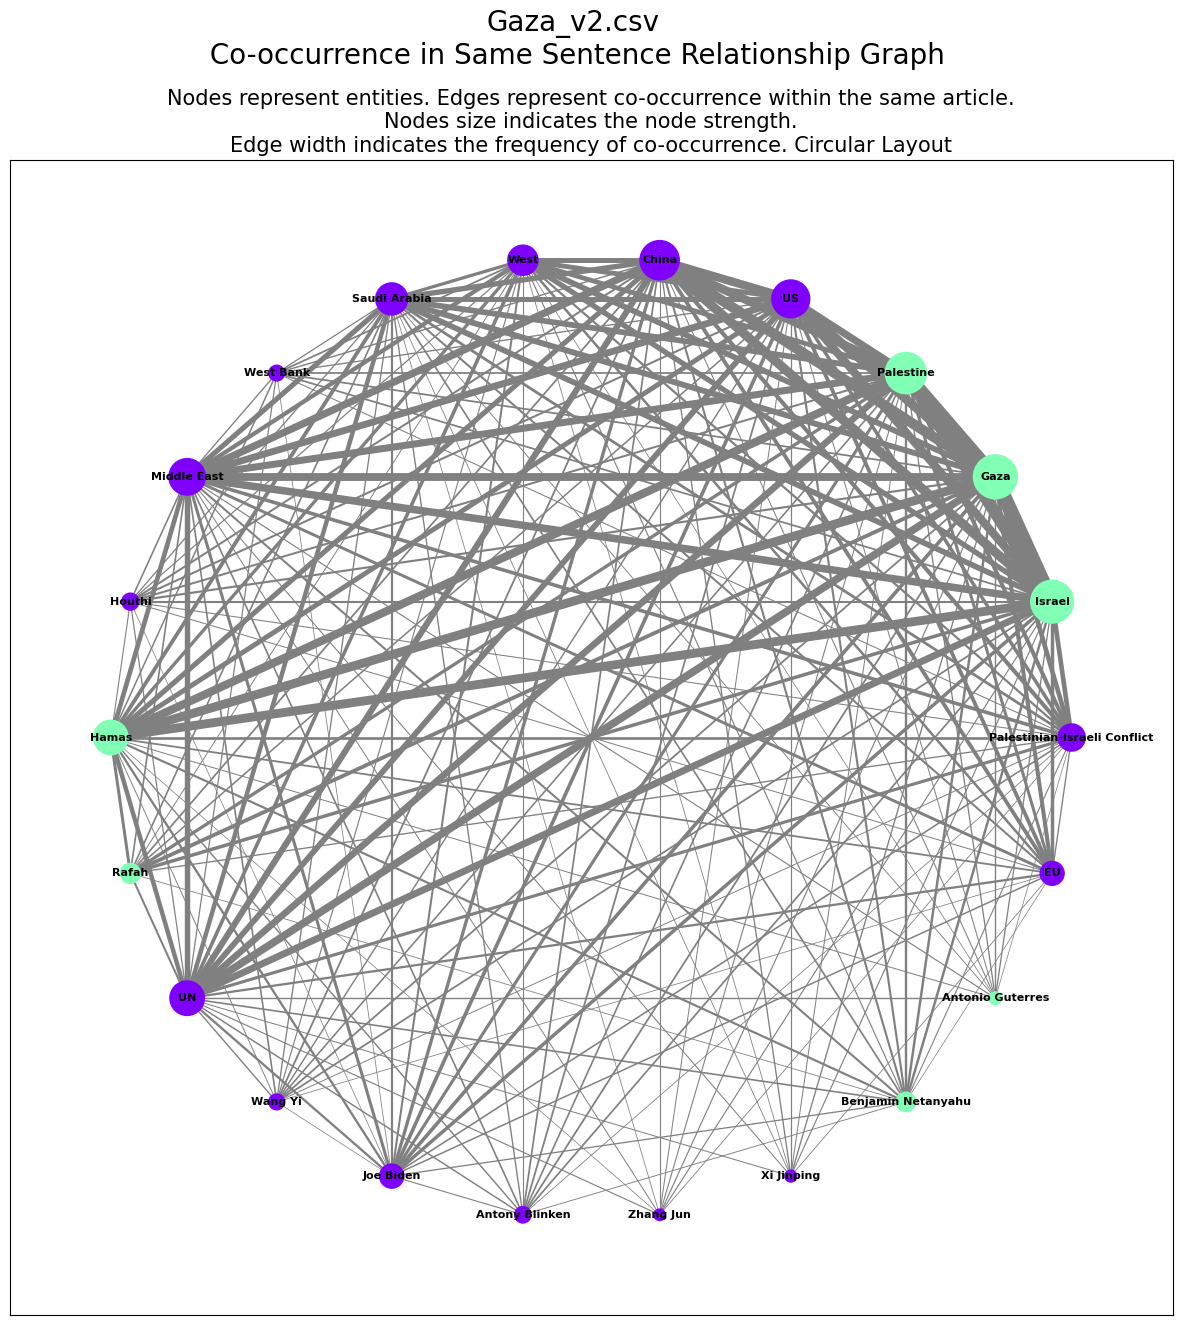

In [245]:
#draw the graph
plt.figure(figsize=(15, 15))
pos = nx.circular_layout(G)

#get the community color map
communities = set(partition.values())
colors = [plt.cm.rainbow(i / len(communities)) for i in range(len(communities))]
node_colors = [colors[partition[node]] for node in G.nodes]

#draw nodes with community colors
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, cmap=plt.cm.rainbow, node_color=node_colors)

draw edges with normalized weights
edges = G.edges(data=True)
weights = [edge[2]['weight'] for edge in edges]
max_weight = max(weights)
min_width = 0.2
normalized_weights = [(weight / max_weight * 10) + min_width for weight in weights]
nx.draw_networkx_edges(G, pos, edgelist=edges, width=normalized_weights, edge_color='gray')

#draw labels
nx.draw_networkx_labels(G, pos, font_size=8, font_weight='bold')

#labels = nx.get_edge_attributes(G, 'weight')
#x.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=8)

#add title and show plot
plt.suptitle("Gaza_v2.csv\n Co-occurrence in Same Sentence Relationship Graph", fontsize=20)
plt.title("Nodes represent entities. Edges represent co-occurrence within the same article.\nNodes size indicates the node strength.\nEdge width indicates the frequency of co-occurrence. Circular Layout", fontsize=15
plt.show()